In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

## Problem Statement: Prepare a classification model using SVM for salary data

In [2]:
salary = pd.read_csv('SalaryData_Train(1).csv')

In [3]:
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salary.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
capitalloss,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
hoursperweek,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
for i in salary.columns:
    if salary[i].dtype == object:
        print(salary[i].value_counts())

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64
education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: count, dtype: int64
maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: count, dtype: int64
occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sal

<Axes: xlabel='Salary', ylabel='age'>

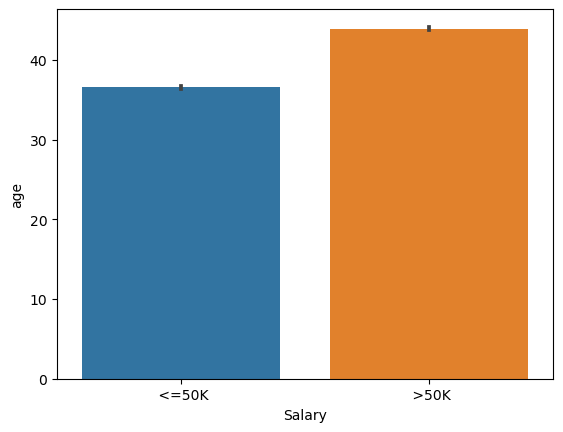

In [7]:
sns.barplot(x='Salary',y='age',data=salary)

In [8]:
X = salary.drop(columns='Salary')
y = salary['Salary']

In [9]:
X = pd.get_dummies(X, drop_first=True).astype(int)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21112, 94)
(9049, 94)
(21112,)
(9049,)


## SVM

In [11]:
svmclf = SVC(C=1.0,kernel='sigmoid',gamma='auto',class_weight='balanced')
svmclf.fit(X_train , y_train)
y_pred = svmclf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 75.102221239916


array([[6796,    0],
       [2253,    0]], dtype=int64)

In [12]:
svmclf = SVC(C=0.5,kernel='poly',gamma='scale',class_weight='balanced')
svmclf.fit(X_train , y_train)
y_pred = svmclf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 79.24632556083544


array([[6775,   21],
       [1857,  396]], dtype=int64)

In [13]:
svmclf = SVC(C=0.3,kernel='rbf',gamma='auto')
svmclf.fit(X_train , y_train)
y_pred = svmclf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 84.98176594098796


array([[6590,  206],
       [1153, 1100]], dtype=int64)

## Problem Statement: Classify the Size Category using SVM

In [15]:
forestfires = pd.read_csv('forestfires.csv')
forestfires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [16]:
forestfires.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [17]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [19]:
def column_boxplots(df,list_cols):
    for i in list_cols:    
        sns.boxplot(x=i, data = df)
        plt.show()

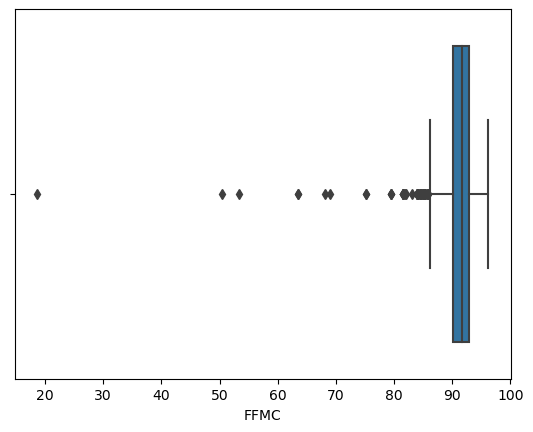

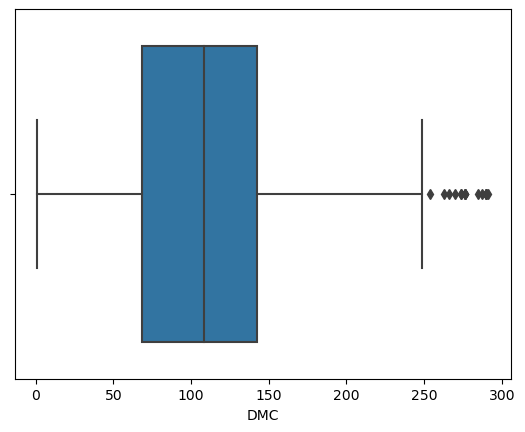

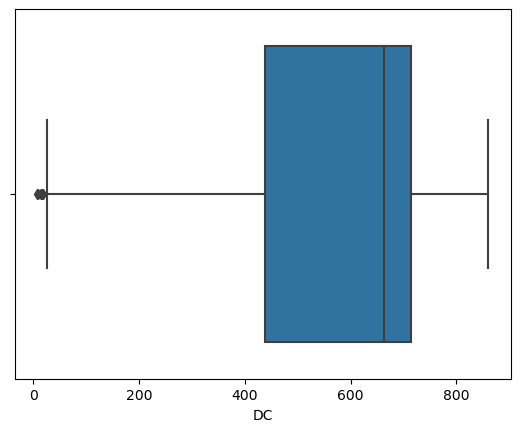

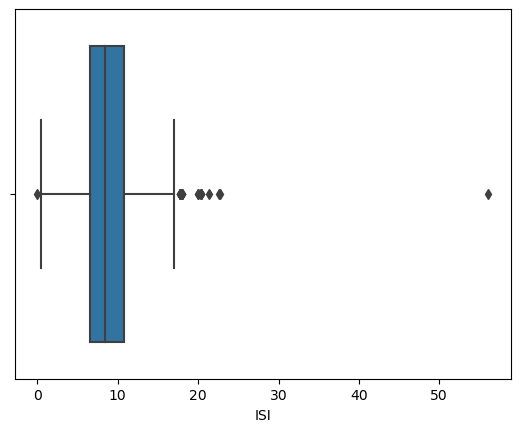

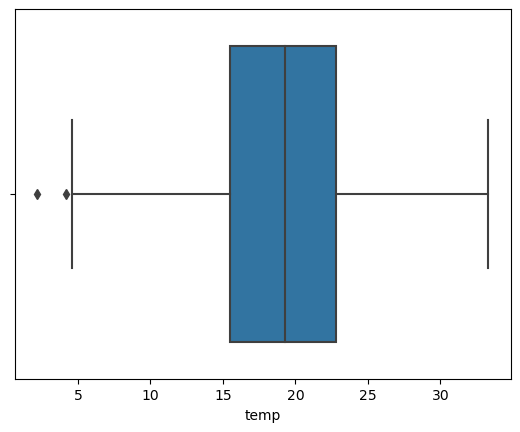

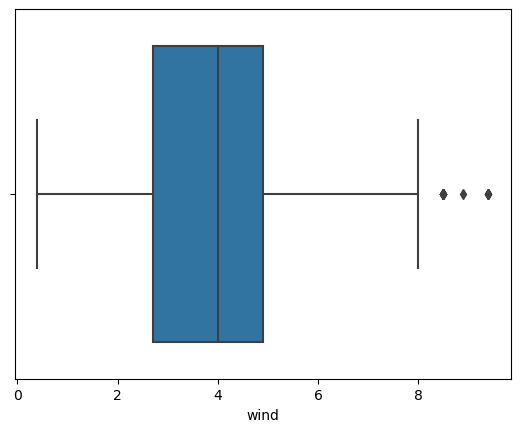

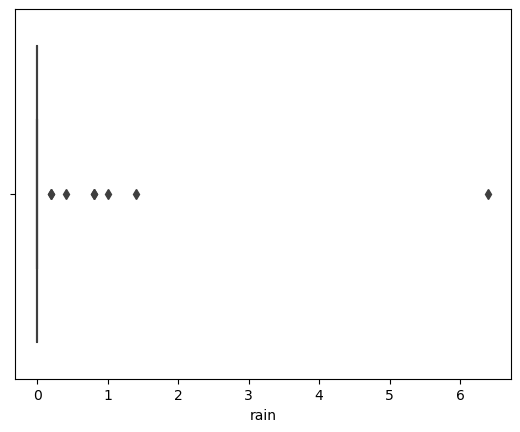

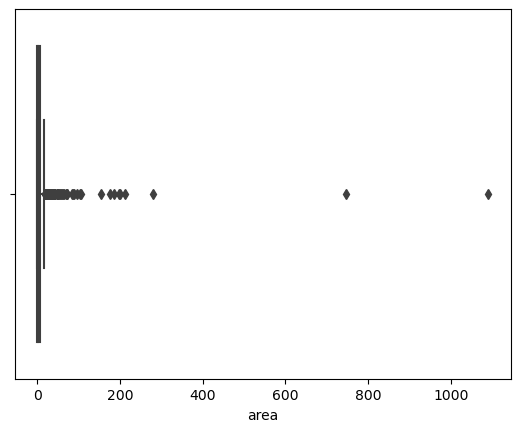

In [20]:
column_boxplots(forestfires,[x for x in forestfires.columns if forestfires[x].dtype == 'float64'])

In [21]:
def outliers_to_median_values(df,column_name):
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Calculate the median of the non-outlier data
    median = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)][column_name].median()

    # Replace outliers with the median
    df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median
    print('Distribution after outlier removal')
    sns.boxplot(x=column_name,data=df)
    plt.show()

Distribution after outlier removal


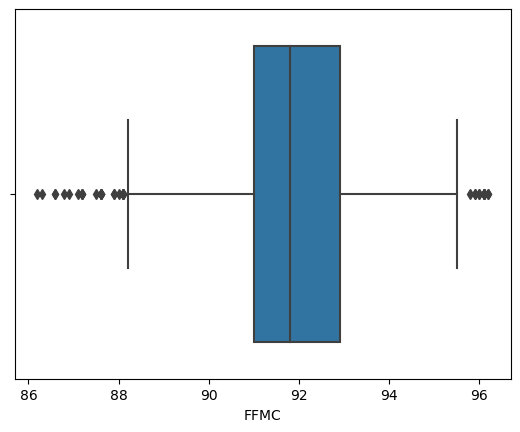

Distribution after outlier removal


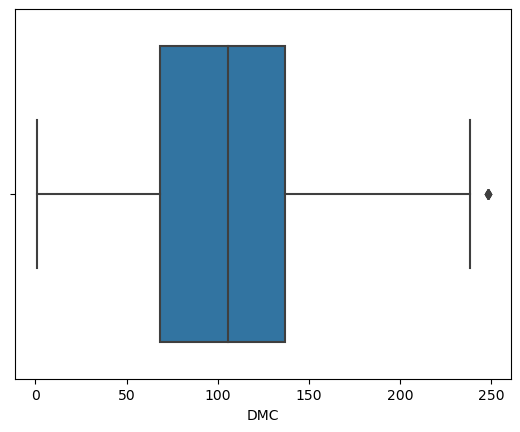

Distribution after outlier removal


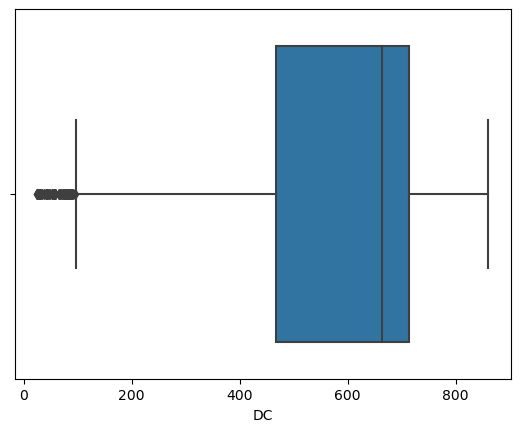

Distribution after outlier removal


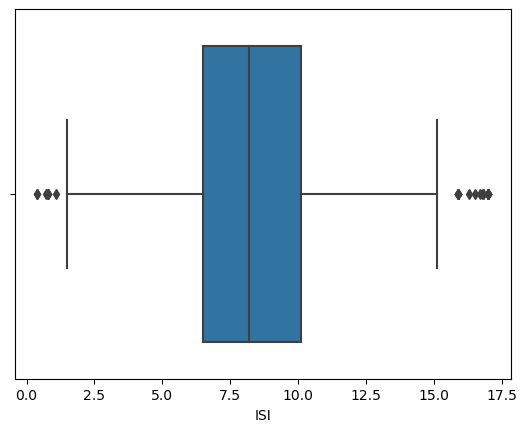

Distribution after outlier removal


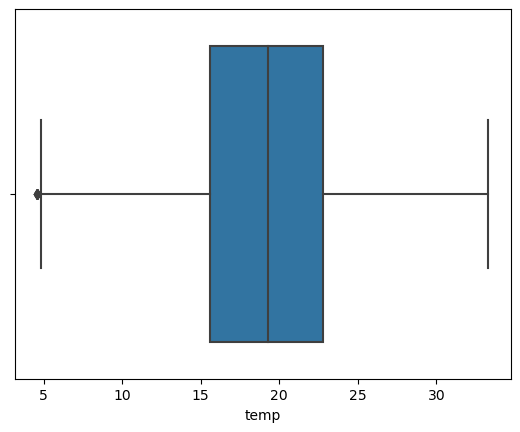

Distribution after outlier removal


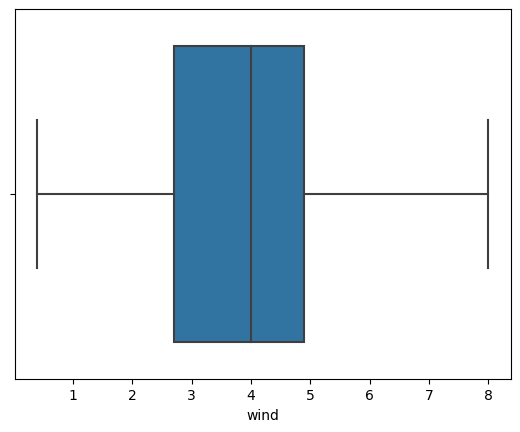

Distribution after outlier removal


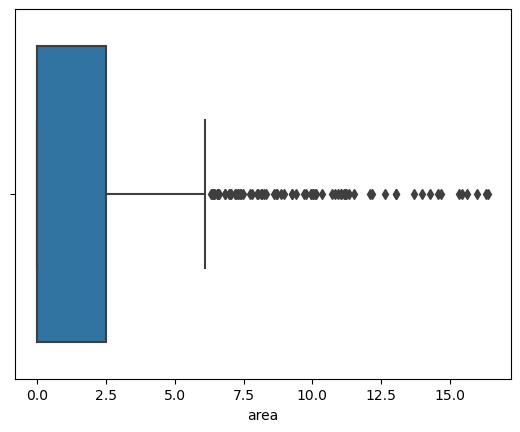

In [22]:
lst = [x for x in forestfires.columns if forestfires[x].dtype == 'float64']
for i in lst:
    if i != 'rain':
        outliers_to_median_values(forestfires,i)

We can drop month and day columns as we have the one-hot encoded versions of them in the dataset

In [30]:
forestfires = forestfires.drop(columns=['month','day'])

In [31]:
forestfires.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [32]:
X = forestfires.drop(columns='size_category')

y = forestfires['size_category']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, stratify=y)

In [34]:
ss = StandardScaler()

In [35]:
X_train.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
506,91.0,166.9,752.6,7.1,18.5,73,4.0,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
457,91.7,191.4,635.9,7.8,19.9,50,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
323,90.7,136.9,822.8,6.8,12.9,39,2.7,0.0,2.18,0,...,0,0,0,0,0,0,0,0,0,1
170,92.9,133.3,699.6,9.2,21.9,35,1.8,0.0,2.57,0,...,0,0,0,0,0,0,0,0,0,1
257,94.2,117.2,581.1,11.0,21.4,44,2.7,0.0,0.68,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_train_scaled.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.510182,1.115151,0.804445,-0.393989,-0.069835,1.727703,0.065621,-0.080502,-0.534492,2.285637,...,-0.150542,-0.193278,-0.074639,-0.254748,-0.208213,-0.33282,-0.052705,-0.052705,-0.16879,-0.718893
1,-0.116043,1.561425,0.312868,-0.183767,0.173073,0.331313,0.065621,-0.080502,-0.534492,-0.437515,...,-0.150542,-0.193278,-0.074639,-0.254748,-0.208213,-0.33282,-0.052705,-0.052705,-0.16879,-0.718893
2,-0.679098,0.568694,1.100150,-0.484084,-1.041467,-0.336526,-0.730135,-0.080502,0.084762,-0.437515,...,-0.150542,-0.193278,-0.074639,-0.254748,-0.208213,-0.33282,-0.052705,-0.052705,-0.16879,1.391028
3,0.559625,0.503119,0.581192,0.236676,0.520085,-0.579377,-1.281043,-0.080502,0.195546,-0.437515,...,-0.150542,-0.193278,-0.074639,-0.254748,-0.208213,-0.33282,-0.052705,-0.052705,-0.16879,1.391028
4,1.291597,0.209854,0.082033,0.777246,0.433332,-0.032963,-0.730135,-0.080502,-0.341330,-0.437515,...,-0.150542,-0.193278,-0.074639,-0.254748,-0.208213,-0.33282,-0.052705,-0.052705,-0.16879,-0.718893


In [37]:
X_test_scaled = pd.DataFrame(ss.fit_transform(X_test),columns=X_test.columns)
X_test_scaled.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.479569,0.382624,0.564590,-0.466438,0.505508,-0.295755,-1.340626,-0.097553,-0.514258,-0.457496,...,-0.080322,-0.216748,0.0,-0.261712,-0.113961,-0.361158,-0.080322,0.0,-0.181969,1.477726
1,0.661818,0.908868,0.482926,1.311637,1.379147,-1.176968,-0.512988,-0.097553,-0.459211,-0.457496,...,-0.080322,-0.216748,0.0,-0.261712,-0.113961,-0.361158,-0.080322,0.0,-0.181969,-0.676716
2,-0.012638,-1.703558,0.473852,-1.861543,-2.489825,2.096109,0.951294,-0.097553,-0.076504,-0.457496,...,-0.080322,4.613644,0.0,-0.261712,-0.113961,-0.361158,-0.080322,0.0,-0.181969,-0.676716
3,0.973106,-0.047939,-0.520548,1.639897,1.254341,0.081908,0.059991,-0.097553,1.291804,-0.457496,...,-0.080322,-0.216748,0.0,3.820995,-0.113961,-0.361158,-0.080322,0.0,-0.181969,-0.676716
4,-0.116400,0.073371,0.884234,-0.685278,0.648143,-0.547530,-1.085968,-0.097553,1.323260,-0.457496,...,-0.080322,-0.216748,0.0,-0.261712,-0.113961,-0.361158,-0.080322,0.0,-0.181969,1.477726


## SVM

In [38]:
svmclf = SVC(C=1.0,kernel='sigmoid',gamma='auto',class_weight='balanced')
svmclf.fit(X_train_scaled , y_train)
y_pred = svmclf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 83.97435897435898


array([[ 26,  16],
       [  9, 105]], dtype=int64)

In [39]:
svmclf = SVC(C=1.0,kernel='linear',gamma='auto')
svmclf.fit(X_train_scaled , y_train)
y_pred = svmclf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 87.82051282051282


array([[ 26,  16],
       [  3, 111]], dtype=int64)

In [42]:
svmclf = SVC(C=0.5,kernel='linear',gamma='scale')
svmclf.fit(X_train_scaled , y_train)
y_pred = svmclf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 88.46153846153845


array([[ 27,  15],
       [  3, 111]], dtype=int64)

In [46]:
svmclf = SVC(C=0.3,kernel='linear',gamma='auto')
svmclf.fit(X_train_scaled , y_train)
y_pred = svmclf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 88.46153846153845


array([[ 27,  15],
       [  3, 111]], dtype=int64)